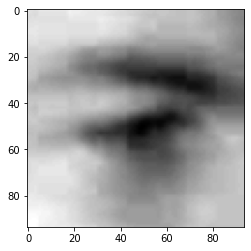

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "eyedataset"

CATEGORIES = ["close_look", "forward_look"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break
    break  
    

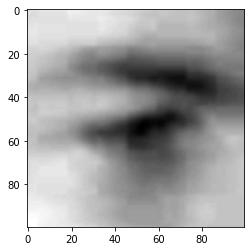

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray') 
plt.show()  


In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) 
        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass

create_training_data()


100%|█████████████████████████████████████████████████████████████████████████████| 3457/3457 [00:04<00:00, 758.06it/s]


In [8]:
import random

random.shuffle(training_data)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)



In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))


            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3)

3-conv-64-nodes-0-dense-1604075780
Epoch 1/10
160/160 [==============================] - 89s 557ms/step - loss: 0.2106 - accuracy: 0.9015 - val_loss: 0.0563 - val_accuracy: 0.9863
Epoch 2/10
160/160 [==============================] - 87s 545ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0485 - val_accuracy: 0.9899
Epoch 3/10
160/160 [==============================] - 87s 542ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0360 - val_accuracy: 0.9909
Epoch 4/10
160/160 [==============================] - 86s 540ms/step - loss: 0.0308 - accuracy: 0.9894 - val_loss: 0.0377 - val_accuracy: 0.9918
Epoch 5/10
160/160 [==============================] - 88s 550ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0273 - val_accuracy: 0.9936
Epoch 6/10
160/160 [==============================] - 86s 539ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.0266 - val_accuracy: 0.9945
Epoch 7/10
160/160 [==============================] - 87s 543ms/step - loss: 0.0156 - accuracy:

In [11]:
model.save('SDP1-CNN.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: SDP1-CNN.model\assets
